In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import SequentialFeatureSelector

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("medical_insurance.csv")

In [4]:
df = data.copy()

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [9]:
df.duplicated().sum()

1435

In [11]:
df.drop_duplicates(inplace=True)

<Axes: >

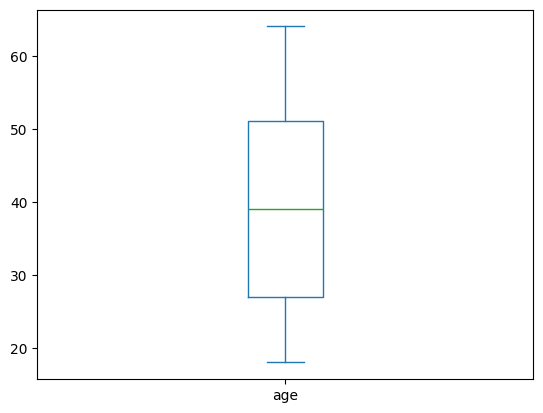

In [12]:
df["age"].plot.box()

In [13]:
df[["age", "charges"]].corr(method="pearson")

,age,charges
age,1.000000,0.298308
charges,0.298308,1.000000


In [14]:
df["sex"].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [15]:
df.groupby("sex")["charges"].mean()

sex
female    12569.578844
male      13974.998864
Name: charges, dtype: float64

In [19]:
male = df[df["sex"]=="male"].index
female = df[df["sex"]=="female"].index

In [20]:
female_sample = np.random.choice(female, 150)
male_sample = np.random.choice(male, 150)

In [24]:
female_sample = df.iloc[female_sample]["charges"]
male_sample = df.iloc[male_sample]["charges"]

In [25]:
f_mean = female_sample.mean()
f_std = female_sample.std()
m_mean = male_sample.mean()
m_std = male_sample.std()
f_mean, f_std, m_mean, m_std

(11939.090505, 10638.798748038622, 14079.758203866664, 12479.74008460109)

In [26]:
n = 150

In [29]:
p_val = (f_mean-m_mean)/np.sqrt((f_std**2/n)+(m_std**2/n))

In [30]:
p_val

-1.5987365862662029

<Axes: >

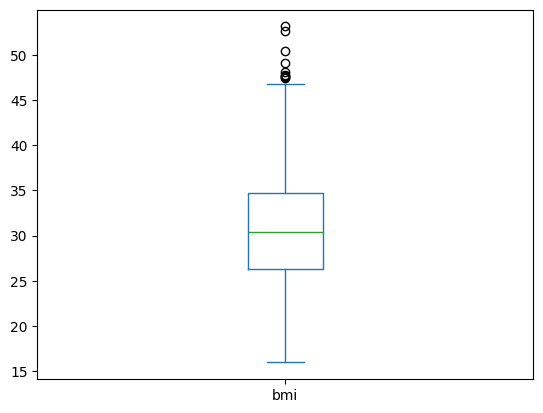

In [31]:
df["bmi"].plot.box()

In [32]:
df[["bmi", "charges"]].corr(method="pearson")

,bmi,charges
bmi,1.000000,0.198401
charges,0.198401,1.000000


In [33]:
df["children"].value_counts()

children
0    573
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [35]:
df[["children", "charges"]].corr(method="pearson")

,children,charges
children,1.000000,0.067389
charges,0.067389,1.000000


In [36]:
df["smoker"].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [37]:
df.groupby("smoker")["charges"].mean()

smoker
no      8440.660307
yes    32050.231832
Name: charges, dtype: float64

In [38]:
df.groupby("region")["charges"].mean()

region
northeast    13406.384516
northwest    12450.840844
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

In [40]:
new_df = df[["age", "bmi", "children"]]

In [41]:
scaler = StandardScaler()

In [42]:
scaled_data = scaler.fit_transform(new_df)

In [43]:
scaled_data

array([[-1.44041773, -0.45315959, -0.90923416],
       [-1.51164747,  0.50942165, -0.07944162],
       [-0.79935006,  0.3831546 ,  1.58014347],
       ...,
       [-1.51164747,  1.01448983, -0.90923416],
       [-1.29795825, -0.79752426, -0.90923416],
       [ 1.55123139, -0.26129928, -0.90923416]])

In [44]:
dummies = pd.get_dummies(df[["sex", "region", "smoker"]], drop_first=True, dtype=float)

In [45]:
dummies

,sex_male,region_northwest,region_southeast,region_southwest,smoker_yes
0,0.0,0.0,0.0,1.0,1.0
1,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
1333,1.0,1.0,0.0,0.0,0.0
1334,0.0,0.0,0.0,0.0,0.0
1335,0.0,0.0,1.0,0.0,0.0
1336,0.0,0.0,0.0,1.0,0.0


In [47]:
scaled_df = pd.DataFrame(scaled_data, columns=["age", "bmi", "children"])
scaled_df

,age,bmi,children
0,-1.440418,-0.453160,-0.909234
1,-1.511647,0.509422,-0.079442
2,-0.799350,0.383155,1.580143
3,-0.443201,-1.305052,-0.909234
4,-0.514431,-0.292456,-0.909234
...,...,...,...
1332,0.767704,0.050269,1.580143
1333,-1.511647,0.206053,-0.909234
1334,-1.511647,1.014490,-0.909234
1335,-1.297958,-0.797524,-0.909234


In [50]:
X = pd.concat([dummies, scaled_df], axis=1).dropna().reset_index(drop=True)
X

,sex_male,region_northwest,region_southeast,region_southwest,smoker_yes,age,bmi,children
0,0.0,0.0,0.0,1.0,1.0,-1.440418,-0.453160,-0.909234
1,1.0,0.0,1.0,0.0,0.0,-1.511647,0.509422,-0.079442
2,1.0,0.0,1.0,0.0,0.0,-0.799350,0.383155,1.580143
3,1.0,1.0,0.0,0.0,0.0,-0.443201,-1.305052,-0.909234
4,1.0,1.0,0.0,0.0,0.0,-0.514431,-0.292456,-0.909234
...,...,...,...,...,...,...,...,...
1331,0.0,0.0,0.0,1.0,0.0,0.767704,0.050269,1.580143
1332,1.0,1.0,0.0,0.0,0.0,-1.511647,0.206053,-0.909234
1333,0.0,0.0,0.0,0.0,0.0,-1.511647,1.014490,-0.909234
1334,0.0,0.0,1.0,0.0,0.0,-1.297958,-0.797524,-0.909234


In [51]:
y = df["charges"]

In [53]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y[:-1], test_size=0.25, random_state=24)

In [55]:
X_tr

,sex_male,region_northwest,region_southeast,region_southwest,smoker_yes,age,bmi,children
167,0.0,1.0,0.0,0.0,0.0,-0.514431,0.408572,1.580143
477,1.0,1.0,0.0,0.0,0.0,-1.013039,0.813610,-0.909234
430,1.0,0.0,0.0,1.0,0.0,-1.440418,0.399553,-0.909234
1111,0.0,0.0,1.0,0.0,1.0,-0.799350,-0.713073,1.580143
496,0.0,0.0,0.0,1.0,0.0,-0.585661,-1.158287,0.750351
...,...,...,...,...,...,...,...,...
145,0.0,0.0,1.0,0.0,0.0,-0.728120,1.339177,1.580143
343,1.0,0.0,0.0,0.0,0.0,1.693691,1.000551,-0.909234
192,1.0,0.0,1.0,0.0,0.0,-1.013039,-0.807363,-0.909234
899,1.0,0.0,0.0,0.0,0.0,1.480002,1.681901,-0.909234


In [56]:
lr = LinearRegression()
lr2 = LinearRegression()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor(n_estimators=200)
abr = AdaBoostRegressor(estimator=lr2, n_estimators=200)

In [70]:
d = []
for i in [lr, dtr, rfr, abr]:
    i.fit(X_tr, y_tr)
    y_pr = i.predict(X_te)
    r2 = r2_score(y_te, y_pr)
    mse = mean_squared_error(y_te, y_pr)
    d.append({"Model":i, "Score":r2, "Mean_squared Error":mse})

In [71]:
d

[{'Model': LinearRegression(),
  'Score': 0.6902656669806088,
  'Mean_squared Error': 55440907.8038625},
 {'Model': DecisionTreeRegressor(),
  'Score': 0.4055266911354245,
  'Mean_squared Error': 106407770.7735249},
 {'Model': RandomForestRegressor(n_estimators=200),
  'Score': 0.6698531588554606,
  'Mean_squared Error': 59094645.41176624},
 {'Model': AdaBoostRegressor(estimator=LinearRegression(), n_estimators=200),
  'Score': 0.6827203164346427,
  'Mean_squared Error': 56791488.089518264}]

In [72]:
model_details = pd.DataFrame(d)

In [77]:
model_details

,Model,Score,Mean_squared Error
0,LinearRegression(),0.690266,5.544091e+07
1,DecisionTreeRegressor(),0.405527,1.064078e+08
2,"(DecisionTreeRegressor(max_features=1.0, rando...",0.669853,5.909465e+07
3,"(LinearRegression(), LinearRegression(), Linea...",0.682720,5.679149e+07


In [85]:
selector = SequentialFeatureSelector(estimator=LinearRegression(), cv=5, scoring="r2")

In [86]:
selector.fit(X_tr, y_tr)

SequentialFeatureSelector(estimator=LinearRegression(), scoring='r2')

In [87]:
selected = selector.support_

In [88]:
features = X.columns
features

Index(['sex_male', 'region_northwest', 'region_southeast', 'region_southwest',
       'smoker_yes', 'age', 'bmi', 'children'],
      dtype='object')

In [89]:
selected_features = [features[i] for i, select in enumerate(selected) if select]

In [90]:
selected_features

['smoker_yes', 'age', 'bmi', 'children']

In [91]:
# Model Deployment

In [92]:
# Model Save
# 1) Using Joblib
# 2) Using pickle

In [98]:
import joblib
import pickle

In [96]:
joblib.dump(lr, "Project_1_joblib") 
# Saving Model

['Project_1_joblib']

In [97]:
with open("Project_1_pickle", mode="wb") as file:
    pickle.dump(lr, file)

In [99]:
lr_jl = joblib.load("Project_1_joblib")

In [100]:
lr_jl.predict(X_te)

array([10599.23877133, 12085.00222901,  9512.23688827, 32564.26424804,
       10290.92649589,  7496.59989958,  5117.27249845, 12015.42952804,
        7586.77065087, 31268.09554562, 12047.22327154,  7466.44167793,
        9881.70504833,  7897.72740507, 13418.41624333, 10242.51780928,
       28173.62005841,  6951.17059387,  6090.05612264, 29638.94962804,
        6639.38005055,  9150.74386646,  7265.36387552,  5205.92365297,
       26459.08388897, 11733.48682106,  9825.82202529, 33519.23067785,
        4765.5934674 ,  8900.21484439, 11797.17149048,  6428.09197433,
        8193.86094005,  9642.80390916,  8674.45310929, 10437.00744447,
       27961.49879532, 31117.04541684, 11475.71747   ,  8451.51369401,
       11887.28093101, 31206.86705785,  6973.02851169, 11774.77479392,
        6104.47913502, 32772.68204083,  7481.61064469, 31491.41482188,
        7054.46946626,  8991.66382159,  8674.94120907,  7415.18266432,
        7495.94614558,  8808.90213466,  8646.22516821,  7716.34049577,
      

In [101]:
with open("Project_1_pickle", mode="rb") as file:
    lr_pk = pickle.load(file)

In [102]:
lr_pk.predict(X_te)

array([10599.23877133, 12085.00222901,  9512.23688827, 32564.26424804,
       10290.92649589,  7496.59989958,  5117.27249845, 12015.42952804,
        7586.77065087, 31268.09554562, 12047.22327154,  7466.44167793,
        9881.70504833,  7897.72740507, 13418.41624333, 10242.51780928,
       28173.62005841,  6951.17059387,  6090.05612264, 29638.94962804,
        6639.38005055,  9150.74386646,  7265.36387552,  5205.92365297,
       26459.08388897, 11733.48682106,  9825.82202529, 33519.23067785,
        4765.5934674 ,  8900.21484439, 11797.17149048,  6428.09197433,
        8193.86094005,  9642.80390916,  8674.45310929, 10437.00744447,
       27961.49879532, 31117.04541684, 11475.71747   ,  8451.51369401,
       11887.28093101, 31206.86705785,  6973.02851169, 11774.77479392,
        6104.47913502, 32772.68204083,  7481.61064469, 31491.41482188,
        7054.46946626,  8991.66382159,  8674.94120907,  7415.18266432,
        7495.94614558,  8808.90213466,  8646.22516821,  7716.34049577,
      

In [103]:
X_te

,sex_male,region_northwest,region_southeast,region_southwest,smoker_yes,age,bmi,children
454,1.0,0.0,1.0,0.0,0.0,-0.514431,2.601847,0.750351
542,0.0,0.0,1.0,0.0,0.0,1.693691,0.924299,-0.909234
927,0.0,0.0,1.0,0.0,0.0,0.126637,0.581574,-0.079442
271,1.0,0.0,0.0,1.0,1.0,0.767704,0.579934,0.750351
763,0.0,0.0,0.0,0.0,0.0,1.266312,0.190474,-0.909234
...,...,...,...,...,...,...,...,...
23,0.0,0.0,0.0,0.0,1.0,-0.371972,0.206053,-0.079442
750,1.0,1.0,0.0,0.0,0.0,1.764921,1.187492,-0.909234
1288,1.0,0.0,1.0,0.0,0.0,-0.087053,-1.756826,0.750351
230,0.0,1.0,0.0,0.0,0.0,0.197866,0.907081,-0.079442
